In [1]:
from plotnine import (
    ggplot,
    aes,
    geom_point,
    geom_boxplot,
    geom_bar,
    geom_smooth,
    facet_wrap,
    labs,
    theme,
    theme_538,
    element_rect,
    element_text,
)
from plotnine.composition import plot_spacer
from plotnine.data import mtcars

## Plots

In [2]:
p1 = ggplot(mtcars) + geom_smooth(aes("disp", "qsec"))
p2 = ggplot(mtcars) + geom_point(aes("wt", "mpg"))
p3 = ggplot(mtcars) + geom_boxplot(aes("factor(gear)", "mpg"))
p4 = ggplot(mtcars) + geom_bar(aes("carb"))

## The Arithmetic

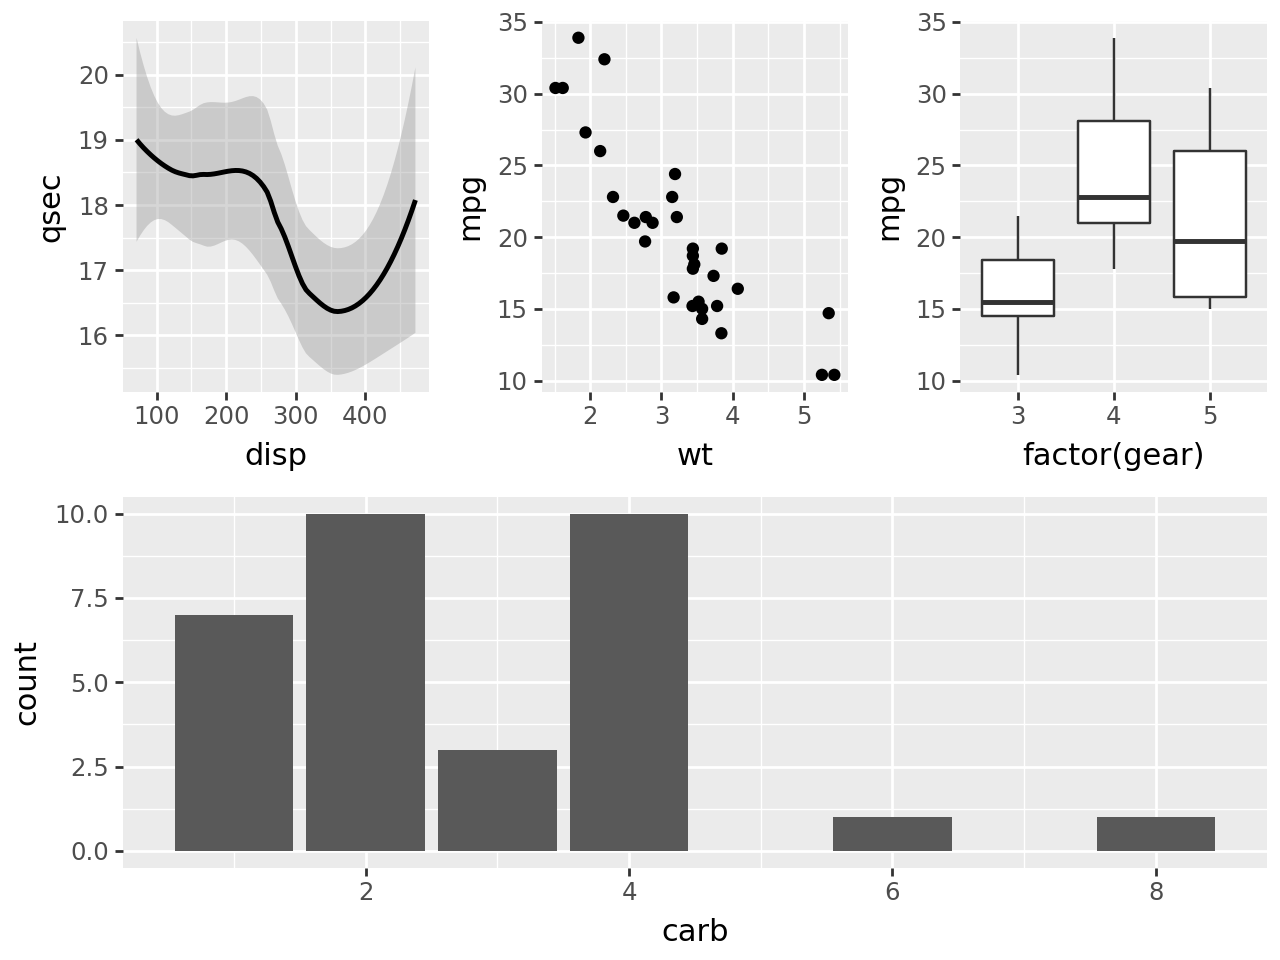

In [3]:
(p1 | p2 | p3) / p4

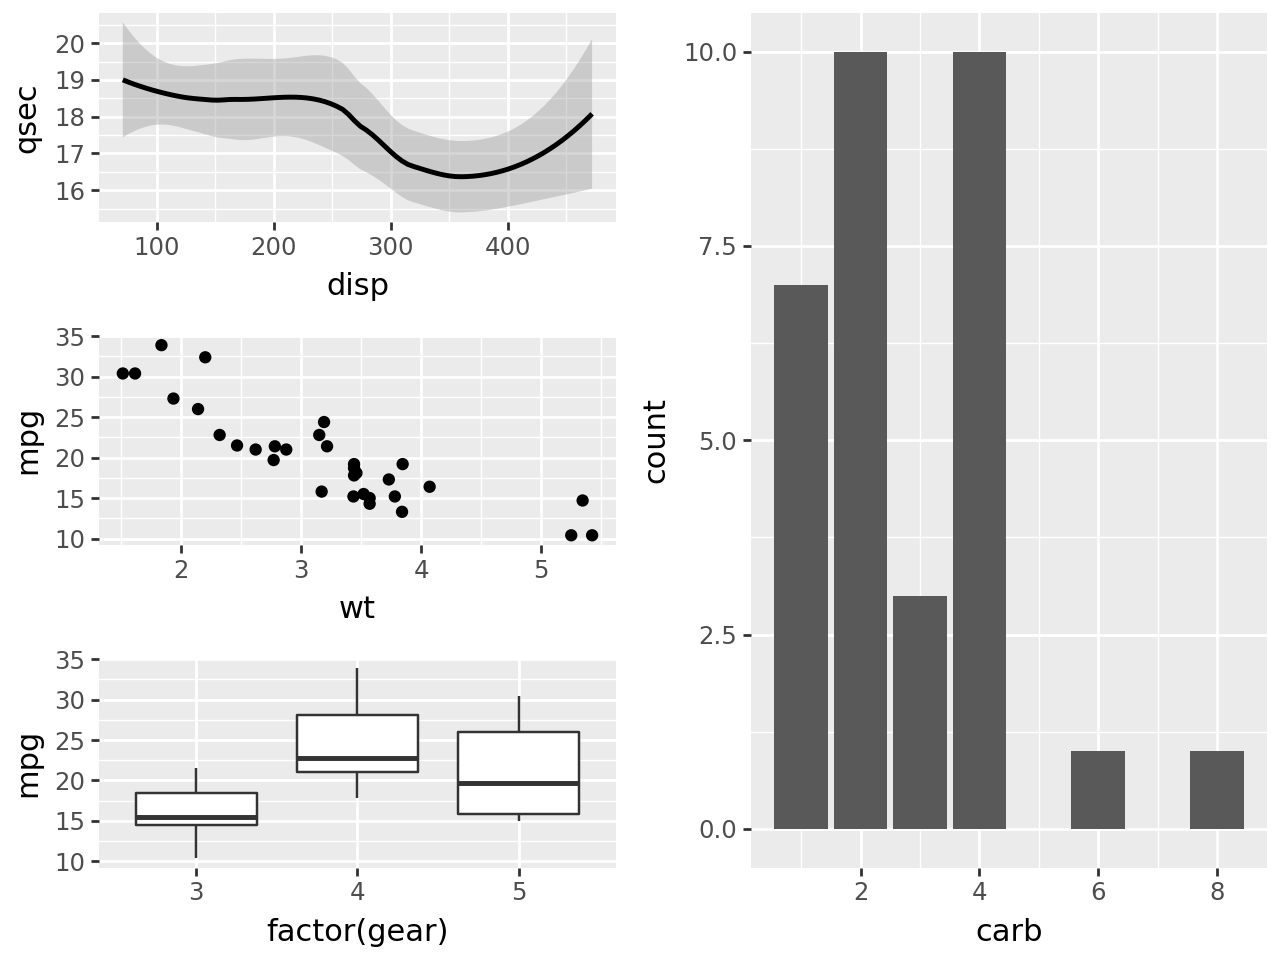

In [4]:
(p1 / p2 / p3) | p4

The grouping of the plots is determined by the precedence of the operators which means these two:

```python
p1 / p2 / p3 | p4
(p1 / p2 / p3) | p4
```

are equivalent.

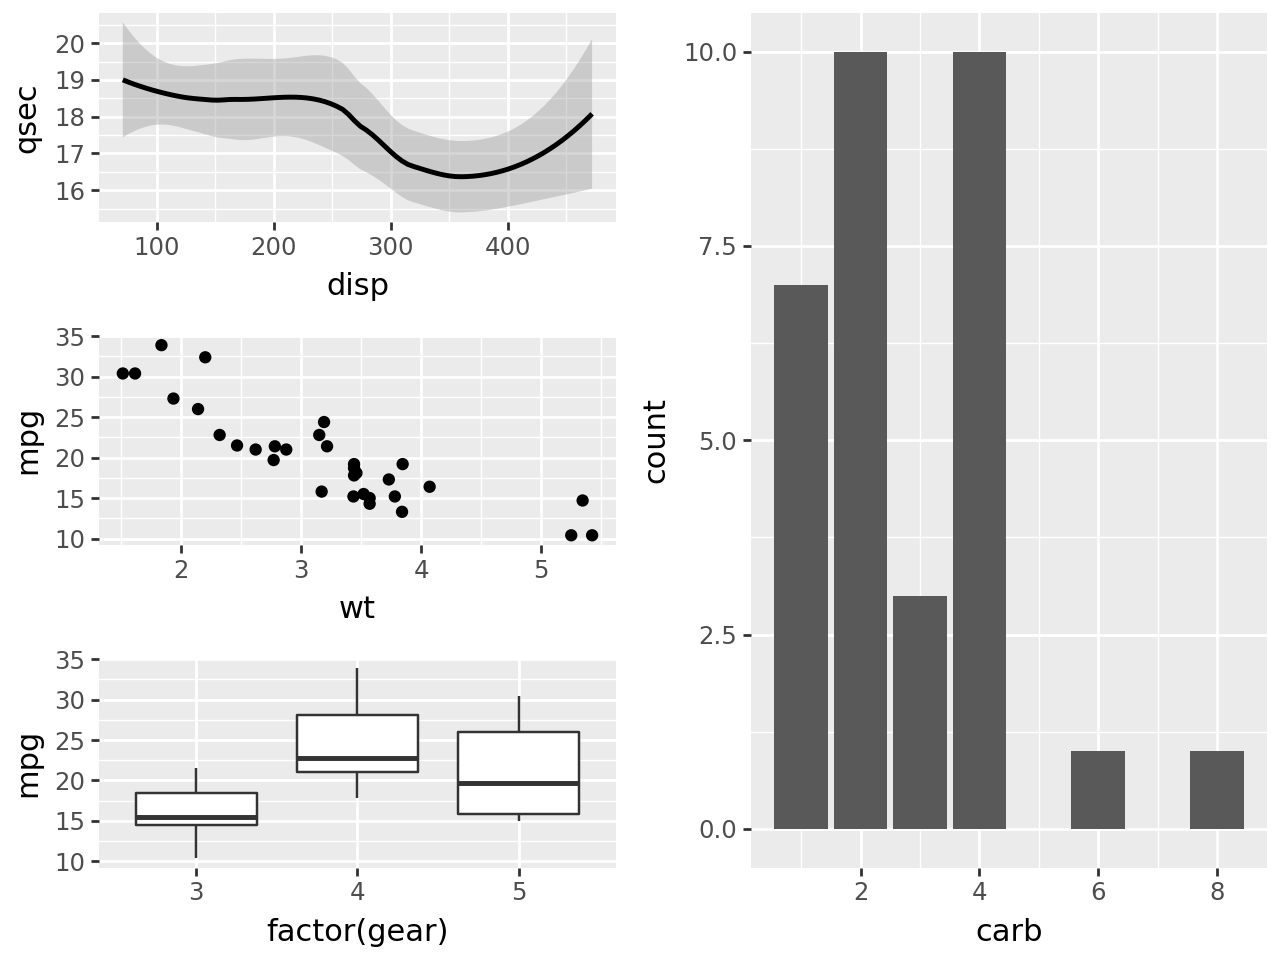

In [5]:
p1 / p2 / p3 | p4

The space allocated within the overall composition is determined by the groups.

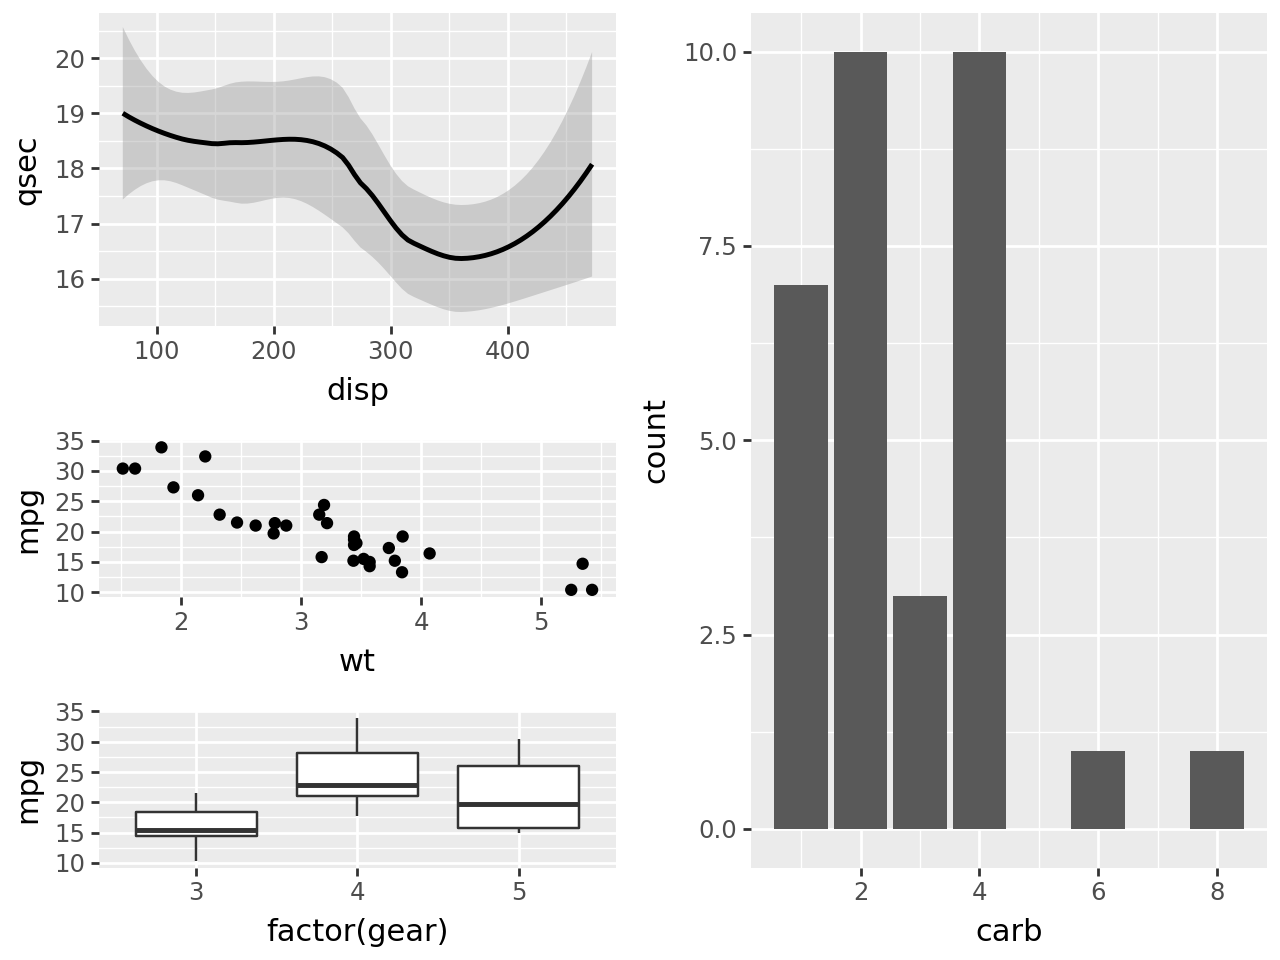

In [6]:
(p1 / (p2 / p3)) | p4

The _panel_ in `p1` has the same height as the _panels_ of `p2` and `p3` combined.

## Add to the composition

When an object _that is not a plot or composition_ is added to the composition, it is
added to the last plot in the composition.

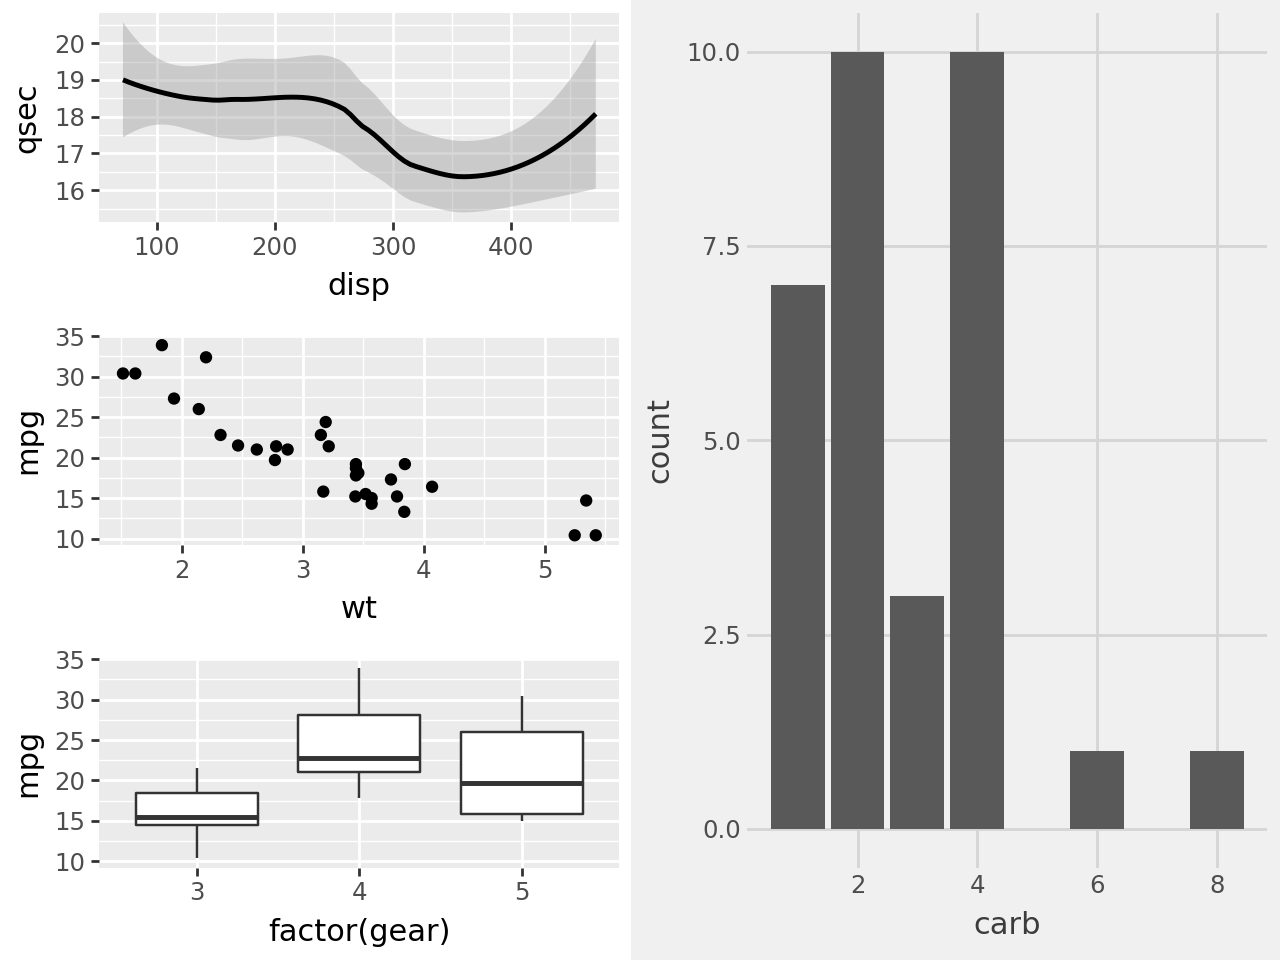

In [7]:
composition = (p1 / p2 / p3) | p4
composition + theme_538()

Which is the same as 

```python
((p1 / p2 / p3) | (p4 + theme_538())
```

When anything you can add to a `ggplot` e.g. geoms, stats scales, coords, ... is added to  composition, it is passed through to the last plot in the composition.

## Changing the image size

The size of each plot is determined by the arrangement within the whole composition and you cannot affect.
For example, with:

```python
p1 / p2 / p3
```

each plot will take up 1/3 of the image height and the panels have the same area.

But you can change the size of the _entire composition_ by setting the `figure_size` of the last plot.

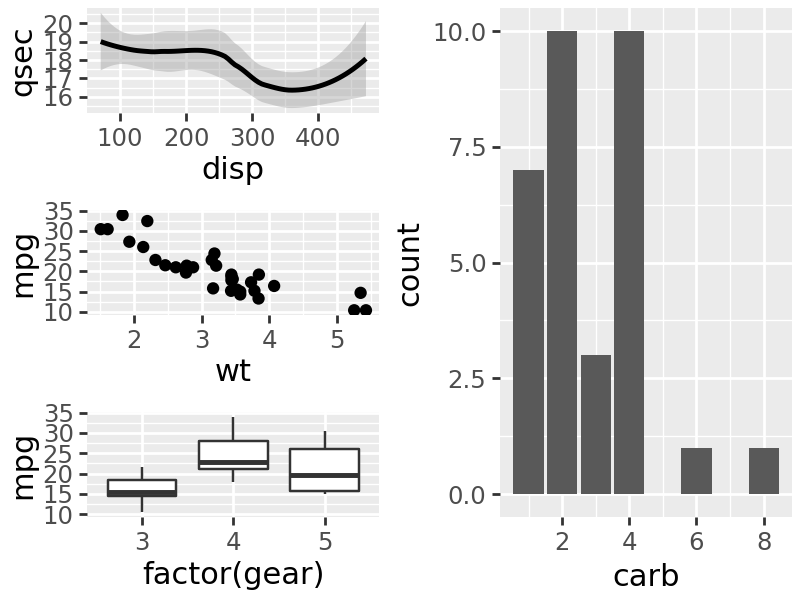

In [8]:
((p1 / p2 / p3) | p4) + theme(figure_size=(4, 3))

## Space and Panel Sizes

You can create space within the composition by adding a `plot_spacer` or by adjusting `plot_margin`.

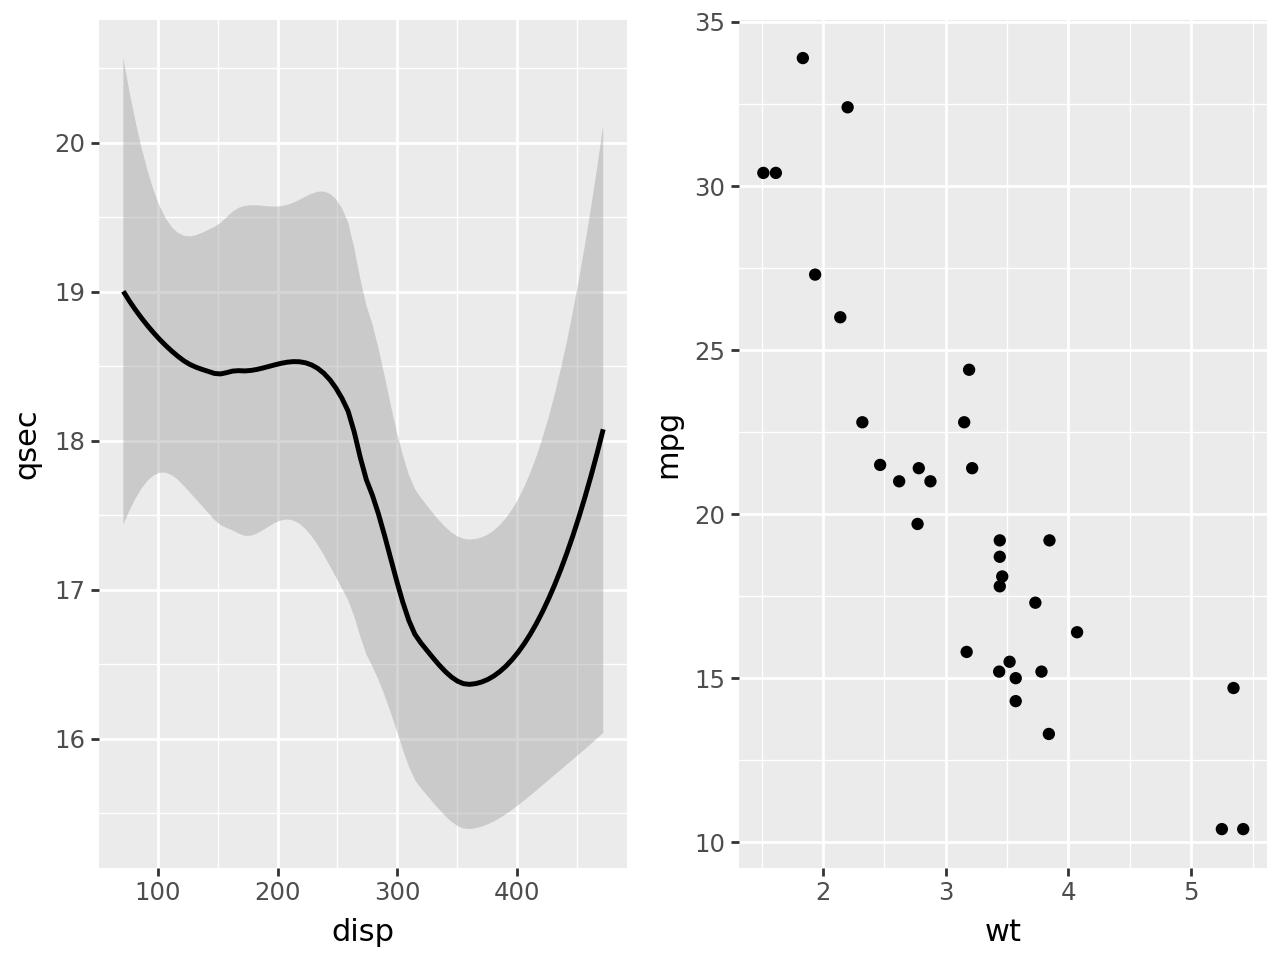

In [9]:
p1 | p2

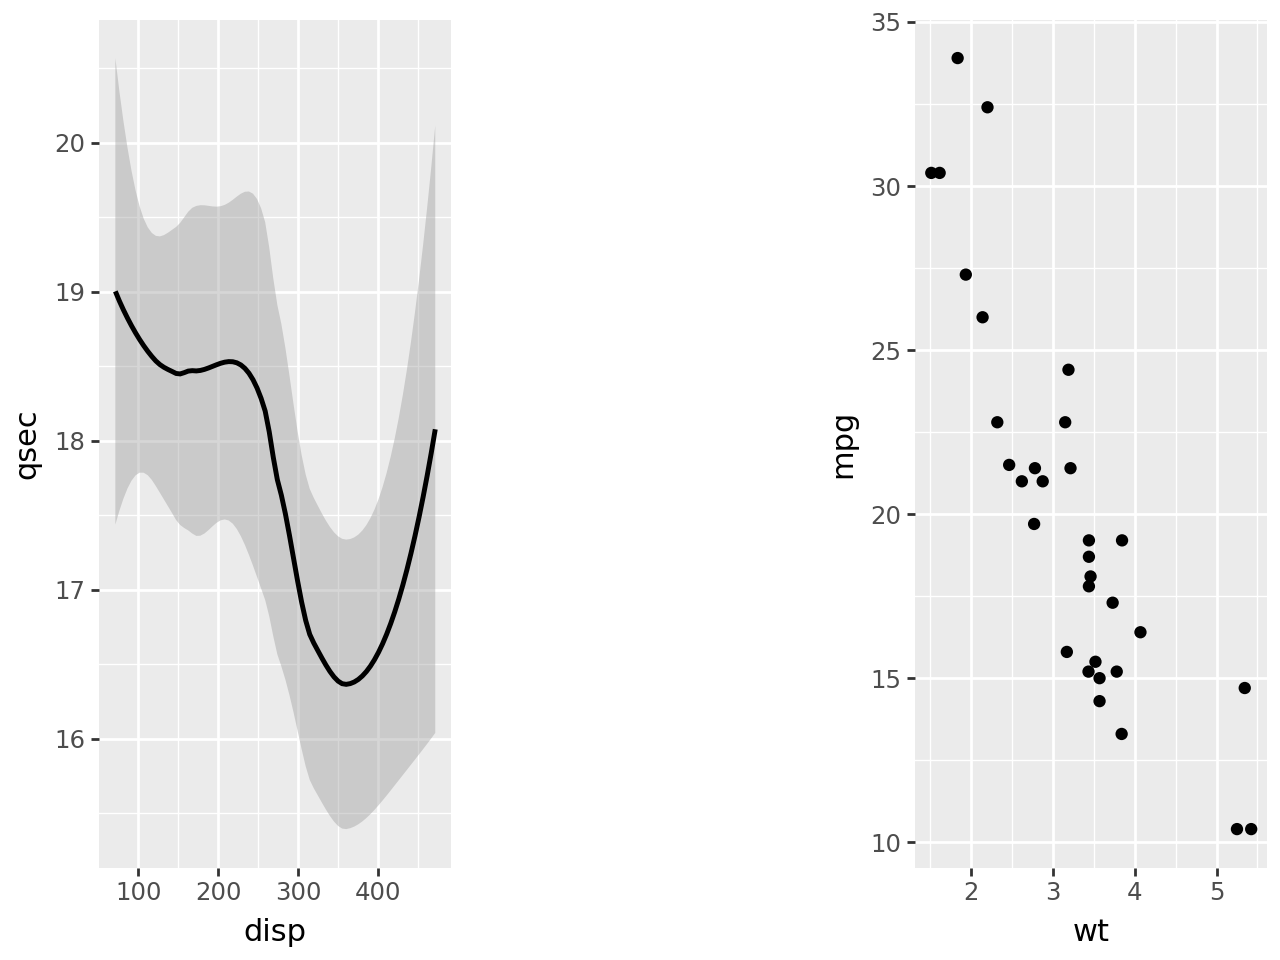

In [10]:
p1 | plot_spacer() | p2

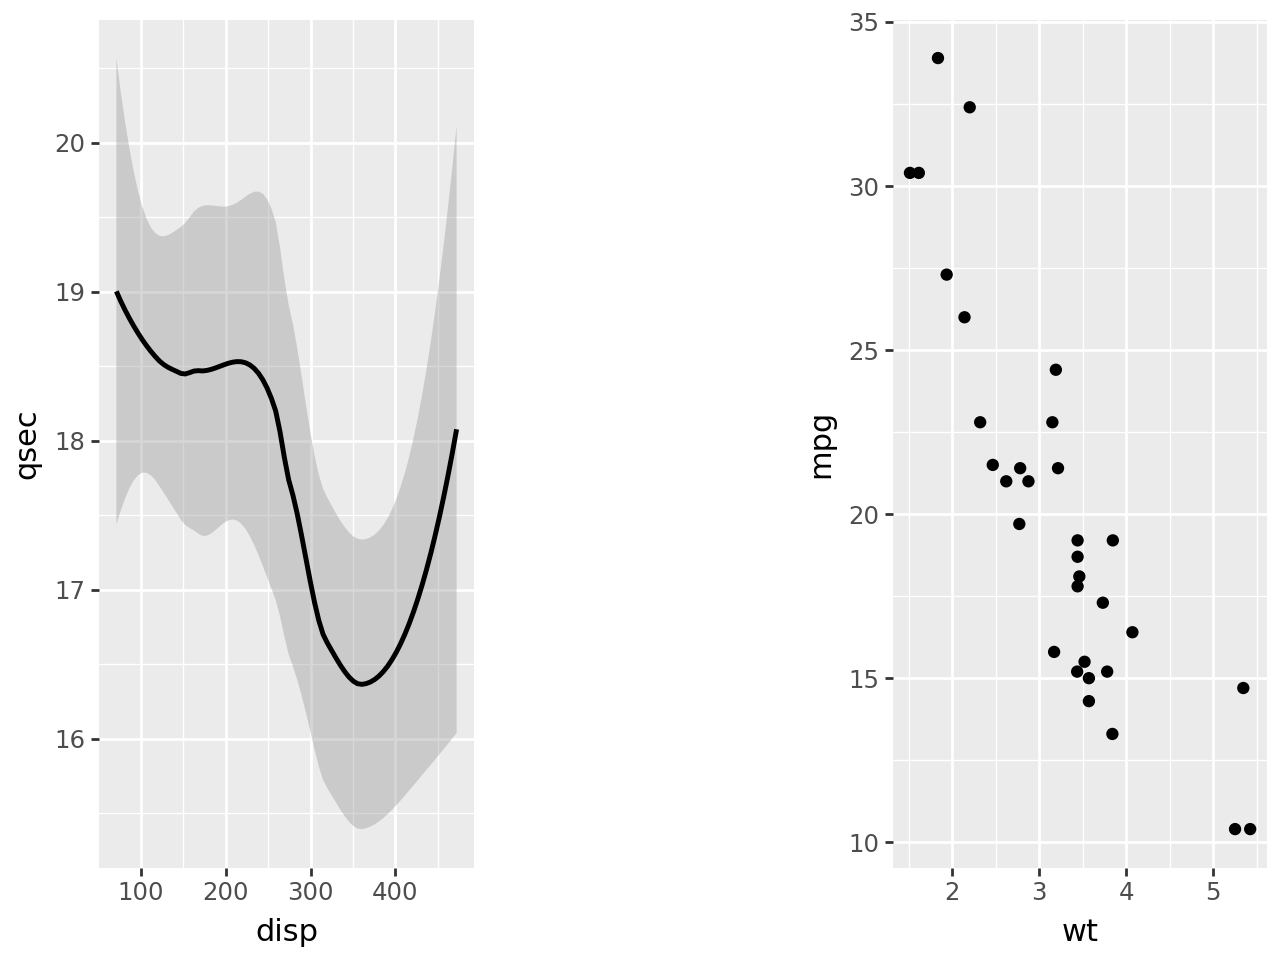

In [11]:
p1 | (p2 + theme(plot_margin_left=.25))

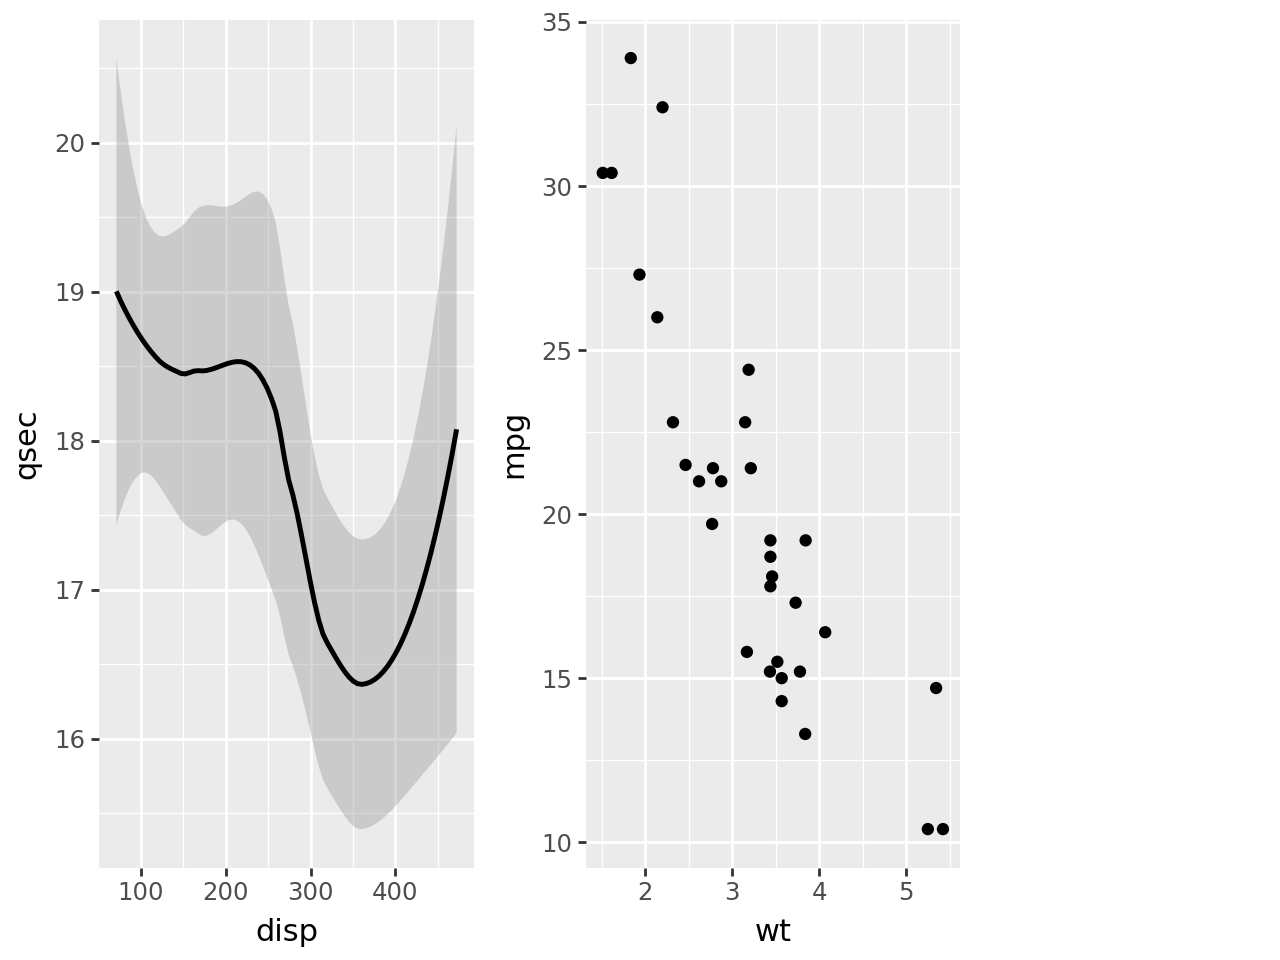

In [12]:
p1 | (p2 + theme(plot_margin_right=.25))

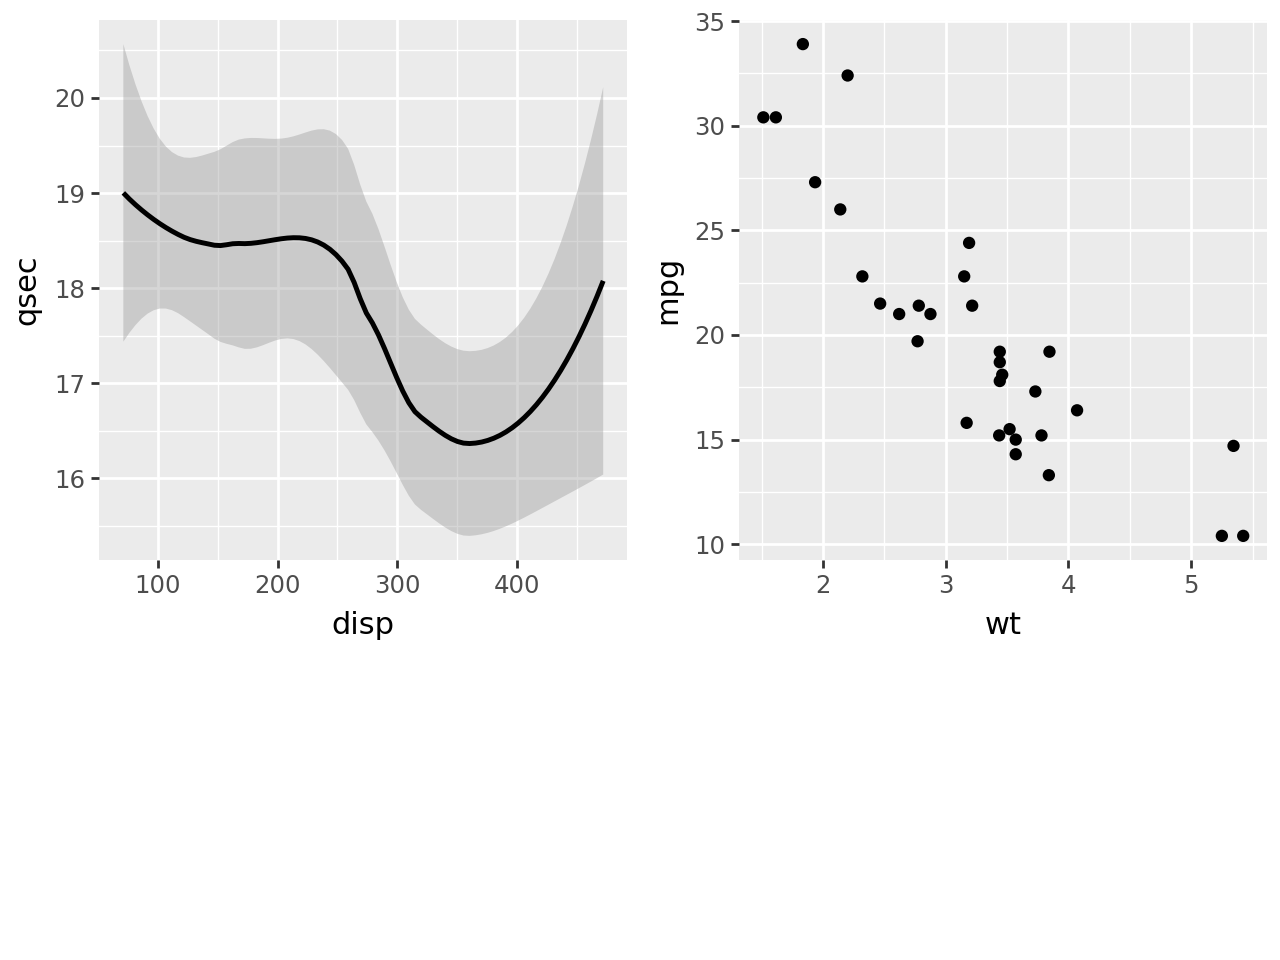

In [13]:
p1 | (p2 + theme(plot_margin_bottom=.25))

While the margin is added to `p2`, the height of `p1` is adjusted so that the panels align.

For any composition group, the space is managed such that the edges of the panels align along one dimension,
and the sizes are equal along the other dimension. For example, when a plot has a legend, it is allocated more
space so that its panel has the same size as the adjacent panel.

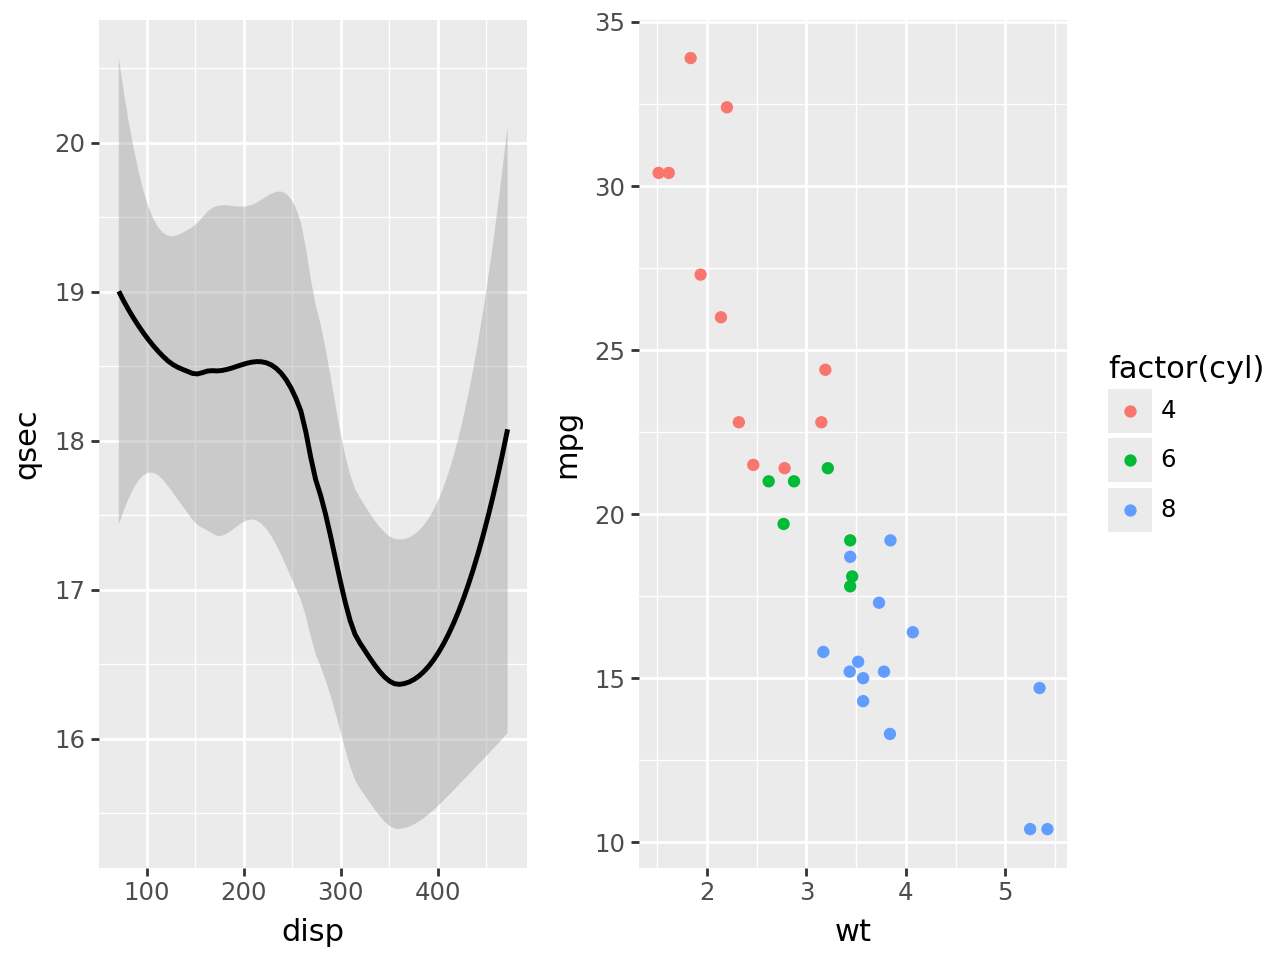

In [14]:
p1 | p2 + aes(color="factor(cyl)")

Making the plot backgrounds visible reveals the size of each plot. 

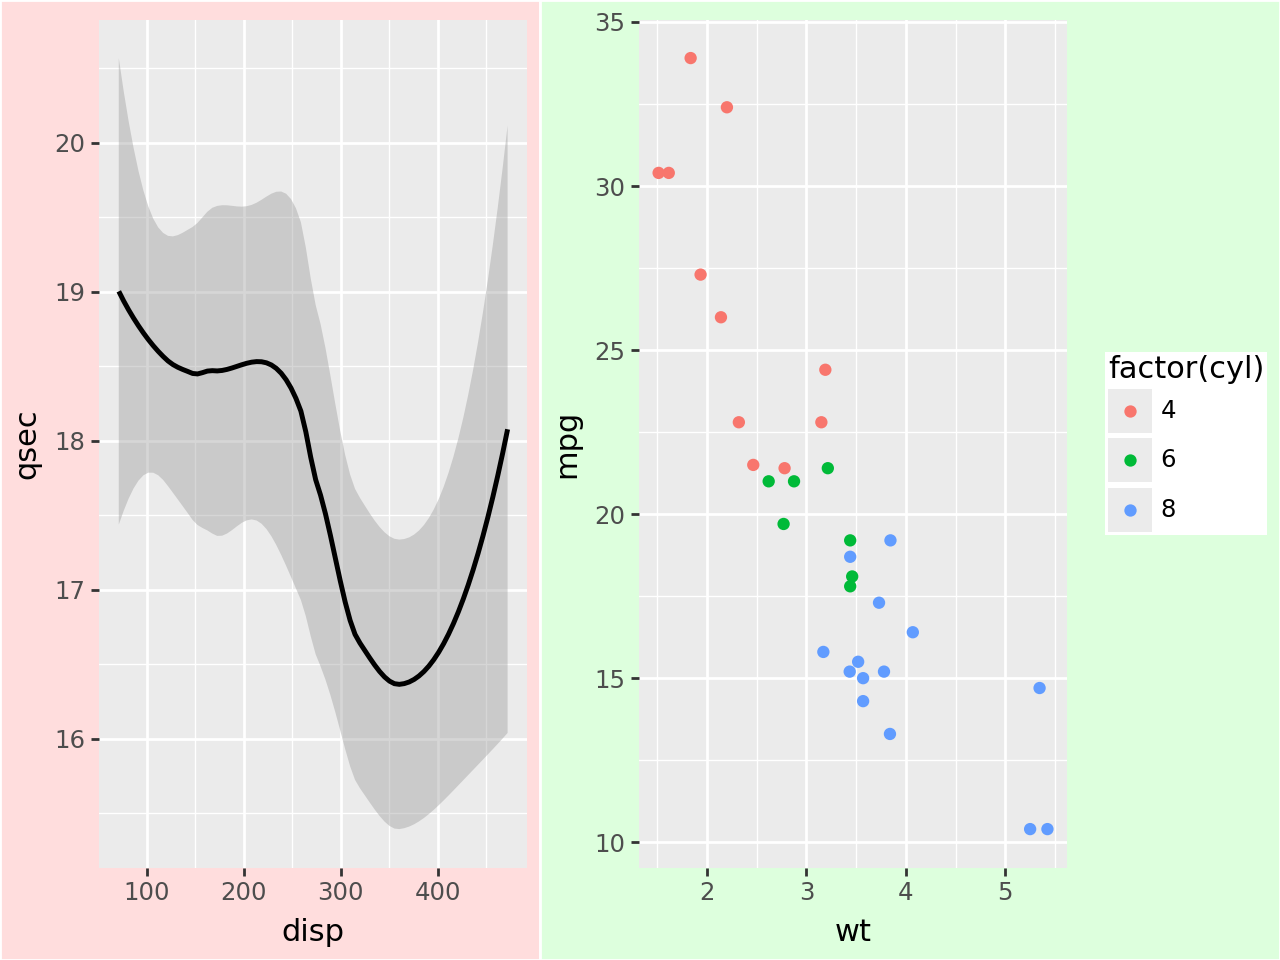

In [15]:
brown_bg = theme(plot_background=element_rect(fill="#FF000022"))
cyan_bg = theme(plot_background=element_rect(fill="#00FF0022"))

(p1 + brown_bg) | (p2 + aes(color="factor(cyl)") + cyan_bg)

Facets also align along the edges of the extreme panels.

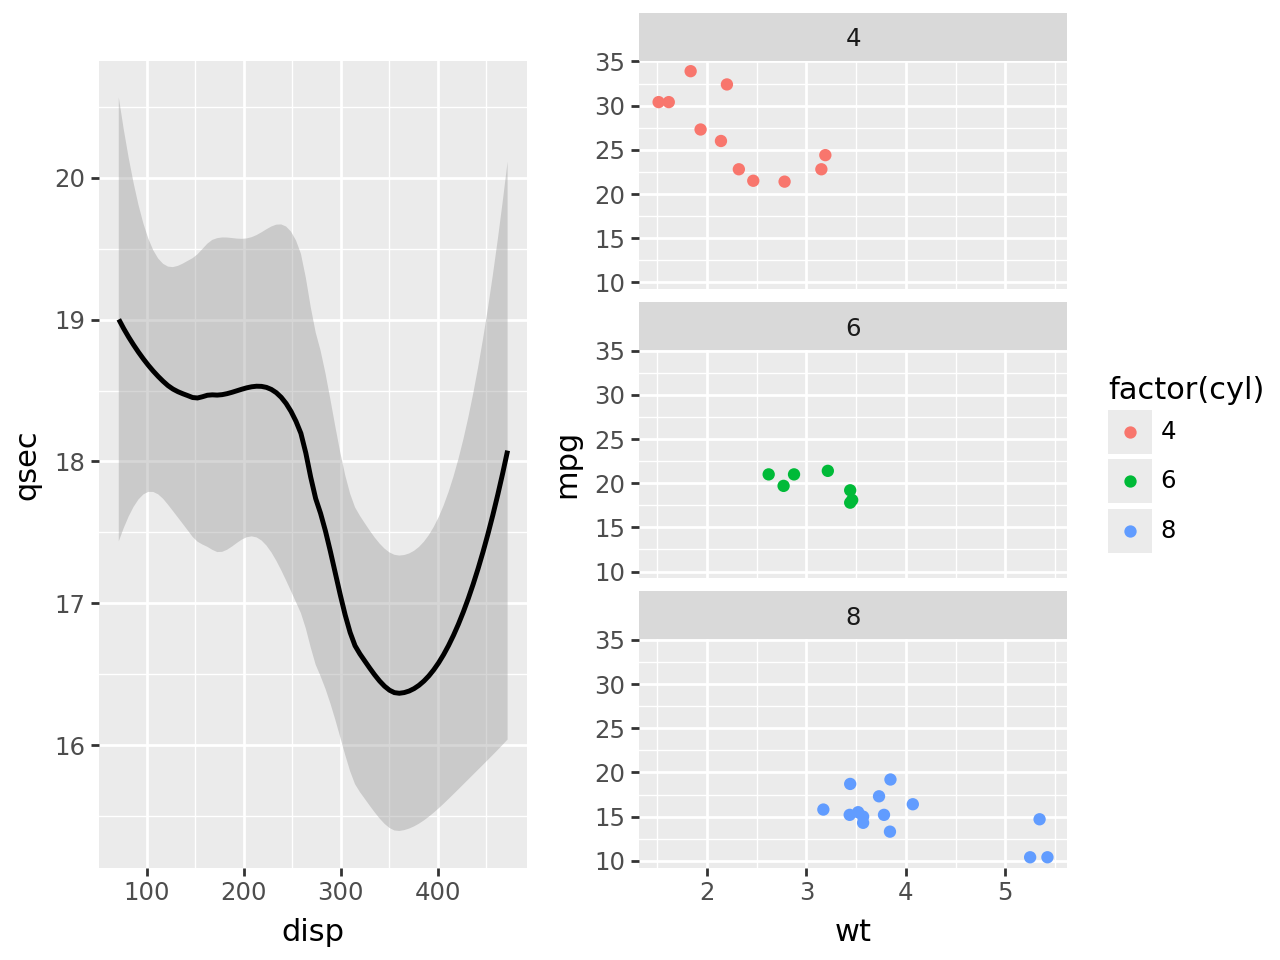

In [16]:
p1 | (p2 + aes(color="factor(cyl)") + facet_wrap("cyl", ncol=1))

And the space between the facet panels counts towards the panel area of the plot.

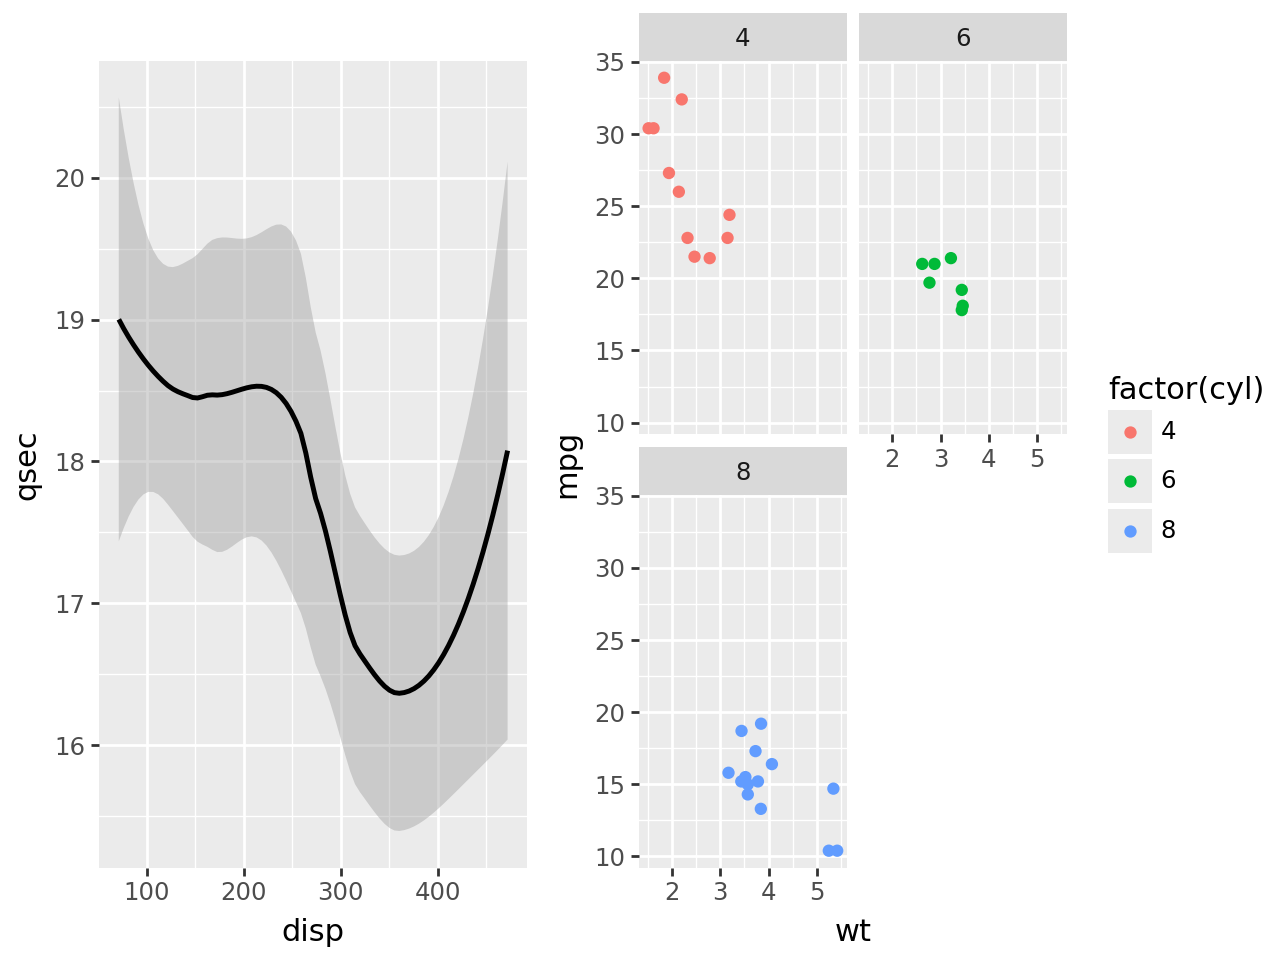

In [17]:
p1 | (p2 + aes(color="factor(cyl)") + facet_wrap("cyl", ncol=2))

## Tagging Plots

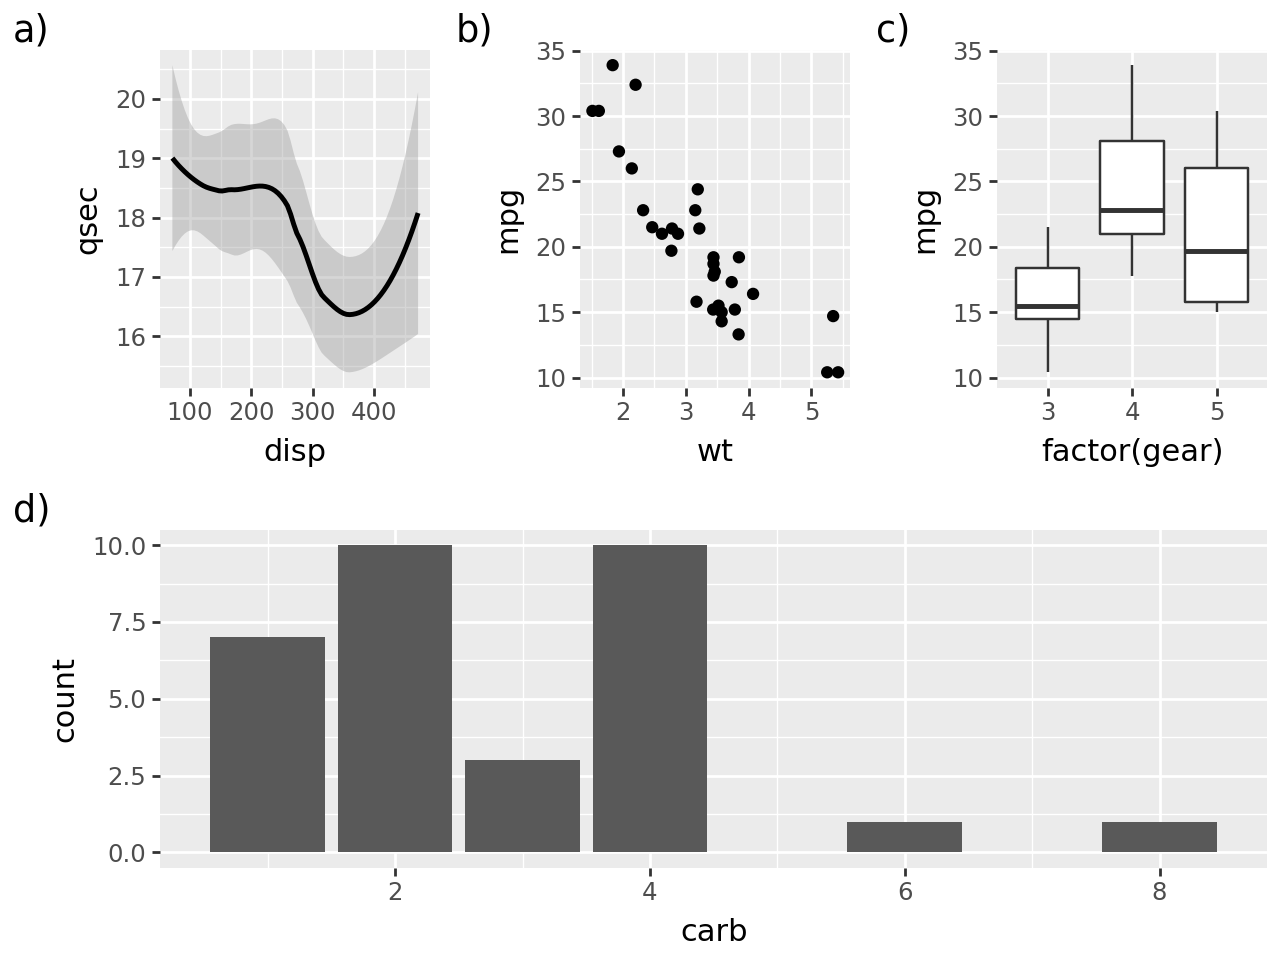

In [18]:
p1_a = p1 + labs(tag="a)")
p2_b = p2 + labs(tag="b)")
p3_c = p3 + labs(tag="c)")
p4_d = p4 + labs(tag="d)")

(p1_a | p2_b | p3_c) / p4_d

By default tags are placed in the top-left margin of each plot, but the position of each tag can be changed.

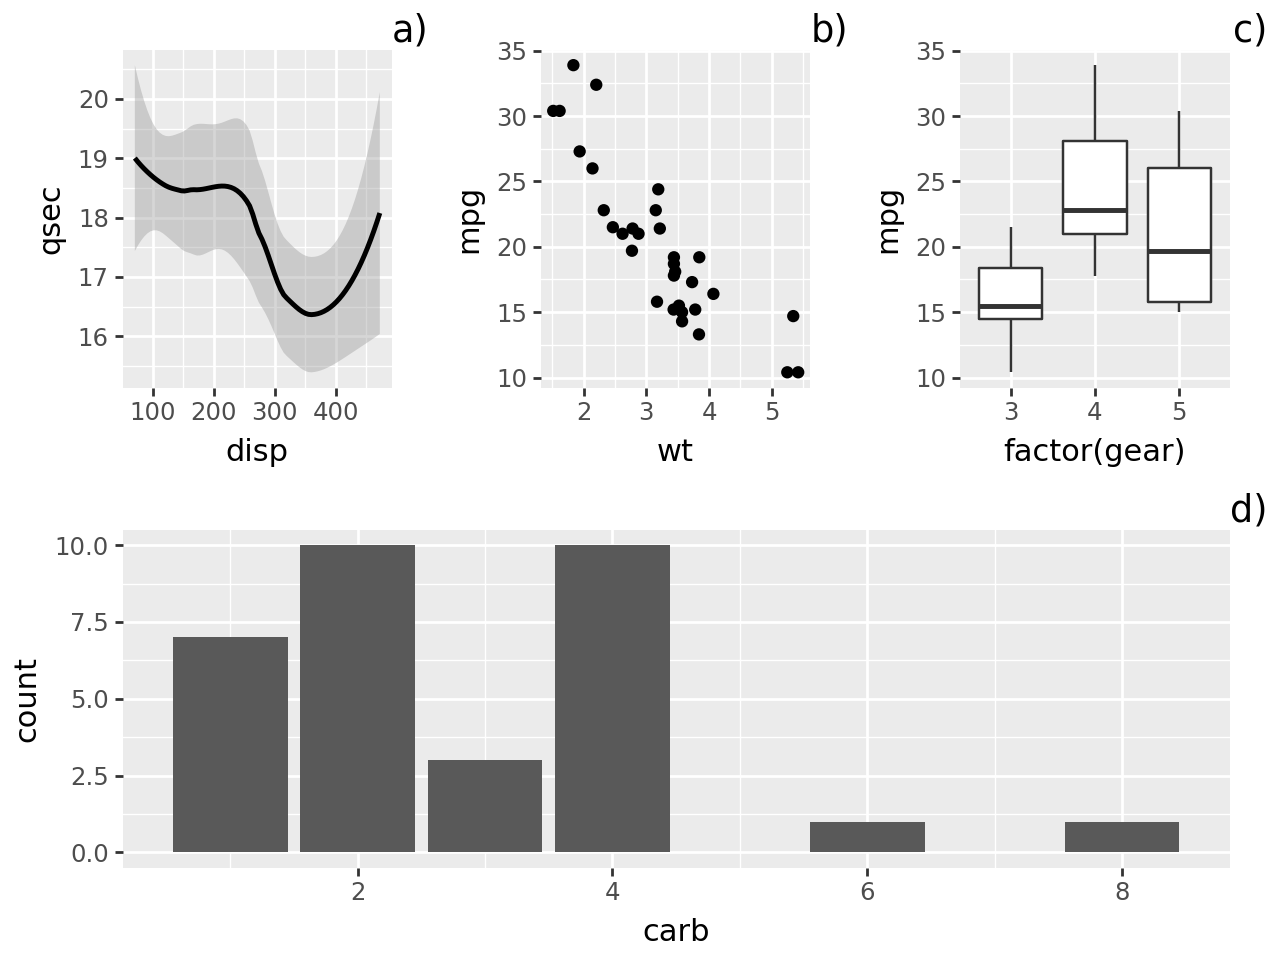

In [19]:
top_right = theme(plot_tag_position="topright")

p1_a = p1 + labs(tag="a)") + top_right
p2_b = p2 + labs(tag="b)") + top_right
p3_c = p3 + labs(tag="c)") + top_right
p4_d = p4 + labs(tag="d)") + top_right

(p1_a | p2_b | p3_c) / p4_d

You can also set the location to one of `margin` (the default), `panel`, `plot`.

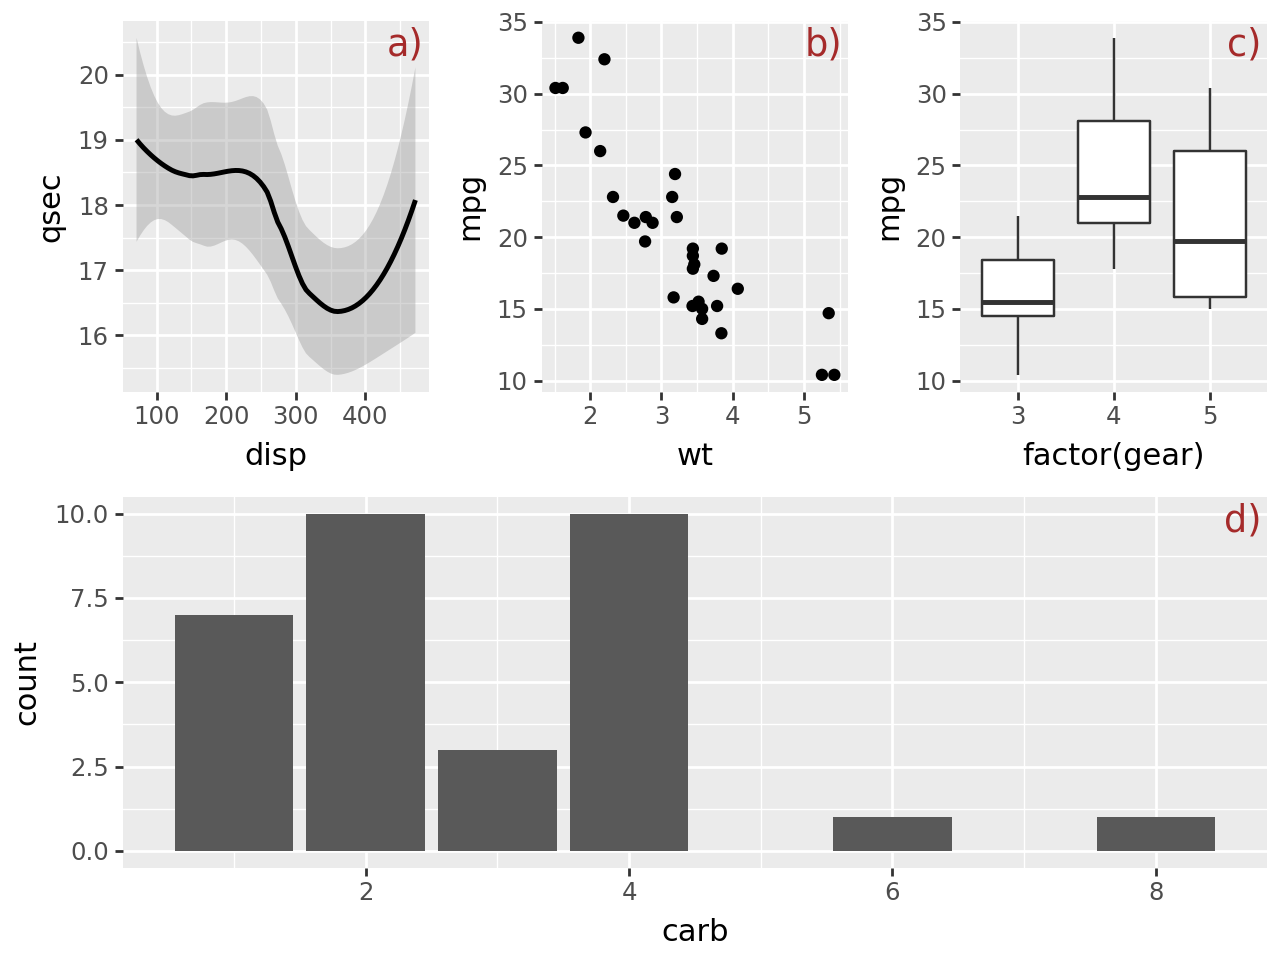

In [20]:
top_right = theme(
    plot_tag_position="topright",
    plot_tag_location="panel",
    plot_tag=element_text(color="brown", margin={"t": 2, "r": 2})
)

p1_a = p1 + labs(tag="a)") + top_right
p2_b = p2 + labs(tag="b)") + top_right
p3_c = p3 + labs(tag="c)") + top_right
p4_d = p4 + labs(tag="d)") + top_right

(p1_a | p2_b | p3_c) / p4_d

## Save

Use the `save` method to save the composition as an image e.g.

```python
(p1 / p2 / p3) | p4).save("plot.png")
```